<a href="https://colab.research.google.com/github/yeiniz/StatML/blob/main/pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계적기계학습 (숙명여대 통계학과 2024-1) lec 02 : PyTorch 101


**Acknowledgement** 본 강의노트는 원작자의 허가 하에 다음 강좌의 강의노트를 일부 수정 or 번역함 :

Justin Johnson, *Deep Learning for Computer Vision*, University of Michigan EECS 498-007 / 598-005.

본 실습 강의노트는 원 강의에서 Assignment 1-2 (A1-2)에 해당합니다.


# 1. 소개

Python 3 및 [PyTorch](https://pytorch.org/)는 학기 내내 사용되므로 익숙해지는 것이 중요합니다. 이 노트북의 자료의 출처는 http://cs231n.github.io/python-numpy-tutorial/ 및 https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb 입니다. 이 자료는 주로 PyTorch에 중점을 둡니다.

### 1.1. Google Colab (구글 코랩)

Google Colaboratory는 클라우드 기반의 Python 3 (iPython Notebook) 개발환경(IDE) 이다.

코랩를 사용하면 구글이 무료로 제공하는 클라우드 가상머신 위에서 Python 코드를 개발할 수 있다. 또한 Python 기반의 기계학습 라이브러리들이 (PyTorch, TensorFlow 포함) 이미 가상머신에 설치되어 있어 기계학습 실습을 쉽게 할 수 있다.

단 **리소스 제한**이 존재한다. 90분간 코드 실행이 없으면 자동으로 세션이 종료된다 (가상머신이 초기화됨). 연속하여 12시간 구동하면 또한 세션이 종료된다. 월 9.99달러의 구독료를 내면 세션이 더 오래 지속되고 더 고성능 GPU를 사용할 수 있다.

# 2. PyTorch


[파이토치(PyTorch)](https://pytorch.org/)는 기계학습을 위한 오픈소스 프레임워크이다. 파이토치의 핵심 기능은 다음과 같다:

- 다차원의 **텐서(tensor)** 객체를 지원한다. 파이토치의 텐서 객체는 [numpy](https://numpy.org/)의 텐서 객체와 비슷하나, 추가적으로 ***GPU 가속***을 지원한다!
- 최적화된 **autograd** 엔진이 내장되어 있어 미분값을 자동적으로 계산해준다.
- **딥러닝 모델**을 빌드하고 배포하는 과정에 필요한 API 및 코드들이 깔끔하면서도 모듈화되어 있다.

이번학기동안 파이토치가 모든 프로그래밍 숙제에 사용된다. 이 노트북 파일은 **텐서 API**에 초점이 맞추어져 있는데, 최초 몇 숙제들을 수행하기 위해 숙지할 필요가 있다.

파이토치에 대한 더 자세한 정보는 [공식 튜토리얼](https://pytorch.org/tutorials/) 이나  [공식 매뉴얼](https://pytorch.org/docs/1.1.0/)을 참조하라.

파이토치 사용을 위하여는 먼저 `torch` 패키지를 임포트하여야 한다.

버전 체크도 필요하다. 이번 강의에서는 구글 코랩의 디폴트 버전인 2.1.0 (2024년 3월 12일 현재)을 사용할 것이다.

In [5]:
import torch
print(torch.__version__)

2.2.1+cu121


## 2.1. Tensor Basics

### Creating and Accessing tensors

`torch` **tensor**는 모두 같은 유형의 값으로 구성된 다차원 grid이며 음이 아닌 정수 tuple에 의해 인덱싱됩니다. 차원은 텐서의 **rank**입니다. 텐서의 **크기**는 각 차원을 따라 배열의 크기를 제공하는 정수 tuple입니다.

중첩된 Python 리스트에서 `torch` 텐서를 초기화할 수 있습니다. 대괄호를 사용하여 PyTorch tensor의 원소에 접근하거나 원소를 변경할 수 있습니다.

PyTorch tensor에서 원소에 접근하면 PyTorch 스칼라가 반환됩니다. `.item()` 메소드를 사용하여 이것을 Python 스칼라로 변환할 수 있습니다:

In [6]:
import numpy as np
a = np.array([1,2,3])
a

array([1, 2, 3])

In [7]:
# Create a rank 1 tensor from a Python list
a = torch.tensor([1, 2, 3])
print('Here is a:')
print(a)
print('type(a): ', type(a))
print('rank of a: ', a.dim())  #  1
print('a.shape: ', a.shape)

Here is a:
tensor([1, 2, 3])
type(a):  <class 'torch.Tensor'>
rank of a:  1
a.shape:  torch.Size([3])


In [8]:
# Access elements using square brackets
print('a[0]: ', a[0])
print('type(a[0]): ', type(a[0]))
print('type(a[0].item()): ', type(a[0].item()))

a[0]:  tensor(1)
type(a[0]):  <class 'torch.Tensor'>
type(a[0].item()):  <class 'int'>


In [9]:
# Mutate elements using square brackets
a[1] = 10
print('a after mutating:')
print(a)

a after mutating:
tensor([ 1, 10,  3])


위의 예제는 1차원 tensor를 보여줍니다; 비슷한 방식으로 2차원 또는 다차원의 tensors를 생성할 수 있습니다.

In [10]:
# Create a two-dimensional tensor
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print('Here is b:')
print(b)
print('rank of b:', b.dim())
print('b.shape: ', b.shape)

Here is b:
tensor([[1, 2, 3],
        [4, 5, 5]])
rank of b: 2
b.shape:  torch.Size([2, 3])


In [11]:
# Access elements from a multidimensional tensor
print('b[0, 1]:', b[0, 1])
print('b[1, 2]:', b[1, 2])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)


In [12]:
# Mutate elements of a multidimensional tensor
b[1, 1] = 100
print('b after mutating:')
print(b)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


### Tensor constructors

PyTorch는 Tensor를 생성할 수 있는 편리한 방법을 많이 제공합니다. 이렇게 하면 Python 리스트를 사용할 필요가 없습니다. 예시:

- [`torch.zeros`](https://pytorch.org/docs/1.1.0/torch.html#torch.zeros): 모든 원소가 0인 tensor 생성
- [`torch.ones`](https://pytorch.org/docs/1.1.0/torch.html#torch.ones): 모든 원소가 1인 tensor 생성
- [`torch.rand`](https://pytorch.org/docs/1.1.0/torch.html#torch.rand): 균등 난수로 구성된 tensor 생성

tensor 생성 작업의 전체 목록은 [문서에서](https://pytorch.org/docs/1.1.0/torch.html#creation-ops) 찾을 수 있습니다.

In [13]:
# Create a tensor of all zeros
a = torch.zeros(2, 3)
print('tensor of zeros:')
print(a)

tensor of zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [14]:
# Create a tensor of all ones
b = torch.ones(1, 2)
print('tensor of ones:')
print(b)

tensor of ones:
tensor([[1., 1.]])


In [15]:
# Create a 3x3 identity matrix
c = torch.eye(3)
print('identity matrix:')
print(c)

identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [16]:
# Tensor of random values
d = torch.rand(4, 5)
print('random tensor:')
print(d)

random tensor:
tensor([[0.0889, 0.9399, 0.6059, 0.9930, 0.9032],
        [0.1911, 0.5141, 0.7438, 0.3100, 0.6764],
        [0.0109, 0.9375, 0.2784, 0.9717, 0.8029],
        [0.5372, 0.5776, 0.1819, 0.2846, 0.8872]])


## 2.2. Tensor indexing

우리는 이미 PyTorch 텐서의 개별 원소를 가져오고 설정하는 방법을 살펴보았습니다. PyTorch는 텐서로 색인을 생성하는 다른 많은 방법도 제공합니다. 이러한 다양한 옵션에 익숙해지면 텐서의 다른 부분을 쉽게 수정할 수 있습니다.

### Slice indexing

Python 리스트 및 numpy 배열과 유사하게 PyTorch 텐서는 `start:stop` 또는 `start:stop:step` 구문을 사용하여 **슬라이싱**할 수 있습니다. `stop` 인덱스는 항상 포함되지 않으며 슬라이스에 포함되지 않는 첫 번째 요소입니다.

시작 및 중지 인덱스는 음수일 수 있으며, 이 경우 텐서의 끝에서 거꾸로 계산됩니다.

In [17]:
a = torch.tensor([0, 11, 22, 33, 44, 55, 66])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5 (2, 3, 4번째 elements)
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5 (1번째, 3번째)
print(6, a[:-1])   # (6) All but the last element --> a[:-2], a[-2:]도 해 보세요.
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 tensor([ 0, 11, 22, 33, 44, 55, 66])
1 tensor([22, 33, 44])
2 tensor([22, 33, 44, 55, 66])
3 tensor([ 0, 11, 22, 33, 44])
4 tensor([ 0, 11, 22, 33, 44, 55, 66])
5 tensor([11, 33])
6 tensor([ 0, 11, 22, 33, 44, 55])
7 tensor([33, 55])


다차원 텐서의 경우 다른 유형의 하위 텐서를 추출하기 위해 텐서의 각 차원에 대해 슬라이스 또는 정수를 제공할 수 있습니다.

In [18]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor:')
print(a)
print('shape: ', a.shape)

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
shape:  torch.Size([3, 4])


In [19]:
# Get row 1, and all columns.
print('Single row:')
print(a[1, :])
# * 주 : R에서처럼 a[ ,1] 입력하면 에러남. --> a[:, 1]
print(a[1])  # Gives the same result; we can omit : for trailing dimensions
print('shape: ', a[1].shape)

Single row:
tensor([5, 6, 7, 8])
tensor([5, 6, 7, 8])
shape:  torch.Size([4])


In [20]:
print('Single column:')
print(a[:, 1])
print('shape: ', a[:, 1].shape)

Single column:
tensor([ 2,  6, 10])
shape:  torch.Size([3])


In [21]:
# Get the first two rows and the last three columns
print('First two rows, last two columns:')
print(a[:2, -3:])
print('shape: ', a[:2, -3:].shape)

First two rows, last two columns:
tensor([[2, 3, 4],
        [6, 7, 8]])
shape:  torch.Size([2, 3])


텐서의 단일 행이나 열에 접근하는 두 가지 일반적인 방법이 있습니다. 정수를 사용하면 rank가 1 감소하고 길이가 1인 슬라이스를 사용하면 동일한 rank가 유지됩니다.

In [22]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print('\nTwo ways of accessing a single row:')
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Two ways of accessing a single row:
tensor([5, 6, 7, 8]) torch.Size([4])
tensor([[5, 6, 7, 8]]) torch.Size([1, 4])


In [23]:
# We can make the same distinction when accessing columns::
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print('Two ways of accessing a single column:')
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

Two ways of accessing a single column:
tensor([ 2,  6, 10]) torch.Size([3])
tensor([[ 2],
        [ 6],
        [10]]) torch.Size([3, 1])


**중요.** 텐서를 슬라이싱하면 **view**가 동일한 데이터로 리턴되므로 수정하면 원래 텐서도 수정됩니다. 이를 피하기 위해 `clone()` 메서드를 사용하여 텐서의 복사본을 만들 수 있습니다.

In [24]:
# Create a tensor, a slice, and a clone of a slice
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
b = a[0, 1:] # a[0, 1:]와 b는 메모리상의 같은 객체를 지칭하고 있음. (따라서 b의 변경에 따라 a도 바뀜)
c = a[0, 1:].clone()  # 메모리에서 a[0, 1:]의 사본을 만든 뒤 그것을 c가 가리키게 함.
print('Before mutating:')
print(a)
print(b)
print(c)

Before mutating:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([2, 3, 4])
tensor([2, 3, 4])


In [25]:
a[0, 1] = 20  # a[0, 1] and b[0] point to the same element
print(a)
print(b)
print(c)

tensor([[ 1, 20,  3,  4],
        [ 5,  6,  7,  8]])
tensor([20,  3,  4])
tensor([2, 3, 4])


In [26]:
b[1] = 30     # b[1] and a[0, 2] point to the same element
print(a)
print(b)
print(c)

tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([2, 3, 4])


In [27]:
c[2] = 40     # c is a clone, so it has its own data
print('\nAfter mutating:')
print(a)
print(b)
print(c)


After mutating:
tensor([[ 1, 20, 30,  4],
        [ 5,  6,  7,  8]])
tensor([20, 30,  4])
tensor([ 2,  3, 40])


지금까지 우리는 슬라이싱을 사용하여 서브텐서에 **접근**했습니다. 왼쪽이 슬라이스 표현식이고 오른쪽이 올바른 크기의 상수 또는 텐서인 할당 표현식을 작성하는 것으로 슬라이싱을 사용하여 서브텐서를 **수정**할 수 있습니다.

In [28]:
a = torch.zeros(2, 4, dtype=torch.int64)
print(a)
a[:, :2] = 1
a[:, 2:] = torch.tensor([[2, 3], [4, 5]])
print(a)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]])
tensor([[1, 1, 2, 3],
        [1, 1, 4, 5]])


### Integer tensor indexing

슬라이싱을 사용하여 torch 텐서를 인덱스할 때, 텐서 view의 결과는 항상 원래 텐서의 하위 배열이 됩니다. 이것은 강력하지만 제한적일 수 있습니다.

**index arrays**을 사용하여 텐서를 인덱스할 수 있습니다. 이를 통해 슬라이스를 사용하는 것보다 훨씬 더 유연하게 새로운 텐서를 생성할 수 있습니다.

예를 들어, index arrays을 사용하여 텐서의 행이나 열을 재정렬할 수 있습니다.

In [29]:
# Chunk 2.2.9.

# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])


더 일반적으로 인덱스 배열 `idx0` 및 `idx1`에 각각 `N` 개의 원소가 있는 경우, `a[idx0, idx1]`는 다음과 같습니다.

```
torch.tensor([
  a[idx0[0], idx1[0]],
  a[idx0[1], idx1[1]],
  ...,
  a[idx0[N - 1], idx1[N - 1]]
])
```

(이러한 유사한 패턴은 2차원 이상의 텐서로 확장됩니다)

예를 들어 이것을 사용하여 텐서의 대각선을 얻거나 세팅할 수 있습니다.

In [30]:
# Chunk 2.2.10.

a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Original tensor:')
print(a)

idx = [0, 1, 2]
print('\nGet the diagonal:')
print(a[idx, idx])   # a[0,0] a[1,1] a[2,2]

# * 주의. R의 행렬에서도 에서도 a[idx, idx] 식의 문법을 지원하나 결과가 다름.

# Modify the diagonal
a[idx, idx] = torch.tensor([11, 22, 33])
print('\nAfter setting the diagonal:')
print(a)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Get the diagonal:
tensor([1, 5, 9])

After setting the diagonal:
tensor([[11,  2,  3],
        [ 4, 22,  6],
        [ 7,  8, 33]])


In [31]:
# Create a new tensor from which we will select elements
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('Original tensor:')
print(a)

# Take on element from each row of a:
# from row 0, take element 1;
# from row 1, take element 2;
# from row 2, take element 1;
# from row 3, take element 0
idx0 = torch.arange(4)  # Quick way to build [0, 1, 2, 3]
idx1 = torch.tensor([1, 2, 1, 0])
print('\nSelect one element from each row:')
print(a[idx0, idx1])

# Now set each of those elements to zero
a[idx0, idx1] = 0
print('\nAfter modifying one element from each row:')
print(a)

Original tensor:
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

Select one element from each row:
tensor([ 2,  6,  8, 10])

After modifying one element from each row:
tensor([[ 1,  0,  3],
        [ 4,  5,  0],
        [ 7,  0,  9],
        [ 0, 11, 12]])


### Boolean tensor indexing

Boolean 텐서 인덱싱을 사용하면 Boolean mask에 따라 텐서의 임의 요소를 선택할 수 있습니다. 종종 이러한 유형의 인덱싱은 일부 조건을 충족하는 텐서의 원소를 선택하거나 수정하는 데 사용됩니다.

In [32]:
# Chunk 2.2.12.

a = torch.tensor([[1,2], [3, 4], [5, 6]])
print('Original tensor:')
print(a)

# Find the elements of a that are bigger than 3. The mask has the same shape as
# a, where each element of mask tells whether the corresponding element of a
# is greater than three.
mask = (a > 3)
print('\nMask tensor:')
print(mask)

Original tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Mask tensor:
tensor([[False, False],
        [False,  True],
        [ True,  True]])


In [33]:
# We can use the mask to construct a rank-1 tensor containing the elements of a
# that are selected by the mask
print('Selecting elements with the mask:')
print(a[mask])

# We can also use boolean masks to modify tensors; for example this sets all
# elements <= 3 to zero:
a[a <= 3] = 0
print('\nAfter modifying with a mask:')
print(a)

Selecting elements with the mask:
tensor([4, 5, 6])

After modifying with a mask:
tensor([[0, 0],
        [0, 4],
        [5, 6]])


## 2.3. Reshaping operations

### Reshape opertations

PyTorch는 텐서의 크기를 조작하는 다양한 방법을 제공합니다. 가장 간단한 예는 [`.reshape()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.reshape)입니다. 입력과 같은 개수의 원소지만 크기가 다른 새 텐서를 반환합니다.



`.reshape()`를 사용하여 행렬을 벡터로 만들고 rank 1 벡터를 rank 2 행 또는 열 행렬로 변환할 수 있습니다. (크기가 맞아야 실행 가능)

In [34]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.reshape(8)
print('\nFlattened tensor:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.reshape(1, 8)
print('\nRow vector:')
print(x2)
print('shape:', x2.shape)

Original tensor:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])


In [35]:
# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.reshape(8, 1)
print('Column vector:')
print(x3)
print('shape:', x3.shape)

Column vector:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])


In [36]:
# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.reshape(2, 2, 2)
print('Rank 3 tensor:')
print(x4)
print('shape:', x4.shape)

Rank 3 tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


편의상 `.reshape()`에 대한 호출에는 -1 인수가 포함될 수 있습니다. 이렇게 하면 출력이 입력과 같은 크기가 되도록 해당 차원에 충분한 원소가 배치됩니다. 이렇게 하면 텐서의 크기에 구애받지 않는 방식으로 크기 변경 연산을 쉽게 할 수 있습니다. (나누어 떨어지는 경우만 가능)

In [37]:
# Chunk 2.3.2.
x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x0_flat = x0.reshape(-1)
x0_row = x0.reshape(1, -1)
print('x0:')
print(x0)
print('x0_flat:')
print(x0_flat)
print('x0_row:')
print(x0_row)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6])
x0_row:
tensor([[1, 2, 3, 4, 5, 6]])


In [38]:
x1 = torch.tensor([[1, 2], [3, 4]])
x1_flat = x1.reshape(-1)
x1_row = x1.reshape(1, -1)
print('x1:')
print(x1)
print('x1_flat:')
print(x1_flat)
print('x1_row:')
print(x1_row)

x1:
tensor([[1, 2],
        [3, 4]])
x1_flat:
tensor([1, 2, 3, 4])
x1_row:
tensor([[1, 2, 3, 4]])


### Swapping axes

스스로 시도해볼 수 있는 또 다른 일반적인 크기 변경 연산은 행렬을 전치하는 것입니다. `.reshape()`로 행렬을 전치하려고 하면 당황할 수 있습니다. `reshape()` 함수는 행 우선 순위로 원소를 취하므로 **`.reshape()`로 행렬을 전치할 수 없습니다.**

* 부가설명: 예를 들어 shape (2,2,2) tensor를 `.reshape`를 통하여 shape (4,2) tensor로 변환하면, 다음 순서에 따라 성분들이 재배정됨 :
```
[0,0,0] 번째 성분 --> [0,0]번째 성분
[0,0,1] 번째 성분 --> [0,1]번째 성분
[0,1,0] 번째 성분 --> [1,0]번째 성분
[0,1,1] 번째 성분 --> [1,1]번째 성분
[1,0,0] 번째 성분 --> [2,0]번째 성분
...
```
따라서 텐서의 축을 바꿀 수 있는 함수를 사용해야 합니다. 가장 단순한 함수는 특별히 행렬을 전치하기 위해 사용하는 `.t()`입니다. [function in the `torch` module](https://pytorch.org/docs/1.1.0/torch.html#torch.t)과 [tensor instance method](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.t) 에서 모두 가능합니다.

In [39]:
# Chunk 2.3.4.

# 복붙
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('Original matrix:')
print(x)
print('\nTransposing with view DOES NOT WORK!')
print(x.reshape(3, 2))
print('\nTransposed matrix:')
print(torch.t(x))
print(x.t())

Original matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Transposing with view DOES NOT WORK!
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Transposed matrix:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


## 2.4. Tensor operations

### Elementwise operations

기본 수학 함수는 텐서에서 **원소별로** 작동하고, 연산자 오버로드(예: `x - y`)와 `torch` 모듈의 함수(예: `torch.add(x,y)`), 그리고 torch 객체의 인스턴스 메소드(예. `x.add.y`)에 가능합니다. 모두 동일한 결과를 생성합니다:

In [40]:
# Chunk 2.4.1.

x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# * Operator overload만 해봅니다.

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])


Torch는 또한 많은 표준 수학 함수를 제공합니다. `torch` 모듈의 함수(예: `torch.sqrt(x)`)와 텐서의 인스턴스 메소드(예: `x.sqrt()`)로 사용할 수 있습니다.

사용 가능한 모든 수학 함수의 전체 목록은 [문서에서](https://pytorch.org/docs/stable/torch.html#pointwise-ops) 찾을 수 있습니다. `torch` 모듈의 많은 함수에는 [tensor 객체](https://pytorch.org/docs/stable/tensors.html)에 대한 동일한 인스턴스 메소드가 있습니다.

In [41]:
# Chunk 2.4.2.

# 복붙
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)

print('Square root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


### Reduction operations

지금까지 원소별로 작동하는 텐서에 대한 기본적인 산술 연산을 살펴보았습니다. 우리는 때때로 합계와 같이 **텐서의 일부 또는 전체에 대해 집계**하는 작업을 수행하고자 할 수 있습니다. 이를 **reduction** 연산이라고 합니다. (예. 평균, 중앙값, 최댓값, ...)

위의 원소별 연산과 마찬가지로 대부분의 reduction 연산은 `torch` 모듈의 함수(예: `torch.sum(x)`)와 `tensor` 객체의 인스턴스 메서드(예. `x.sum() `)에서 모두 가능합니다.

가장 간단한 reduction 연산은 합산입니다. `.sum()` 함수를 사용하여 **전체 텐서**를 줄이거 나 `dim` 인수를 사용하여 텐서의 **한 차원만**을 줄일 수 있습니다.

In [42]:
# Chunk 2.4.3.

x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over each row:
# * 0번째 dimension에 대하여 모으기
# * y[j] = sum_i x[i,j]
print('\nSum of each row:')
y = torch.sum(x, dim=0)
print(y)
y = x.sum(dim=0)
print(y)
print(y.shape)

# Sum over each column:
# * 1번째 dimension에 대하여 모으기
# * y[i] = sum_j x[i,j]
print('\nSum of each column:')
y = torch.sum(x, dim=1)
print(y)
y = x.sum(dim=1)
print(y)
print(y.shape)

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum of each row:
tensor([5., 7., 9.])
tensor([5., 7., 9.])
torch.Size([3])

Sum of each column:
tensor([ 6., 15.])
tensor([ 6., 15.])
torch.Size([2])


기타 유용한 reduction 연산에는 [`mean`](https://pytorch.org/docs/stable/torch.html#torch.mean), [`min`](https://pytorch.org/docs/stable/torch.html#torch.min), [`max`](https://pytorch.org/docs/stable/torch.html#torch.max) 가 있습니다. 사용 가능한 모든 reduction 연산의 전체 목록은 [문서에서](https://pytorch.org/docs/stable/torch.html#reduction-ops) 찾을 수 있습니다.

일부 reduction 연산은 둘 이상의 값을 반환합니다. 예를 들어 'min'은 지정된 차원에 대한 최소값과 최소값이 발생하는 인덱스를 모두 반환합니다.

In [43]:
# Chunk 2.4.4.

# 복붙

x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

# Compute the minimum along each row; we get both the value and the minimum
row_min_vals, row_min_idxs = x.min(dim=1)
print('\nMinimum along each row:')
print('values:', row_min_vals)
print('idxs:', row_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])

Minimum along each row:
values: tensor([2., 2.])
idxs: tensor([0, 3])


reduction 연산은 텐서의 순위를 *감소*시킵니다: 축소를 수행하는 차원이 출력 크기에서 제거됩니다. reduction 연산에 `keepdim=True`를 전달하면 지정된 차원이 제거되지 않습니다. 출력 텐서는 대신 해당 차원에서 1의 크기를 갖습니다.

**다차원 텐서로 작업할 때 행과 열에 대해 생각하면 혼란스러울 수 있습니다.**# Chunk 2.4.1.; 대신 각 연산에서 생성될 크기에 대해 생각하는 것이 더 유용합니다.   

In [44]:
# Chunk 2.4.5.

# Create a tensor of shape (128, 10, 3, 64, 64)
x = torch.randn(128, 10, 3, 64, 64)
print(x.shape)

# Take the mean over dimension 1; shape is now (128, 3, 64, 64)
x = x.mean(dim=1)
# x[i,k,l,m] <- (1/10) * sum_j x[i,j,k,l,m]
print(x.shape)

torch.Size([128, 10, 3, 64, 64])
torch.Size([128, 3, 64, 64])


In [45]:
# Take the sum over dimension 2; shape is now (128, 3, 64)
x = x.sum(dim=2)
# x[i,k,m] <- sum_l x[i,k,l,m]
print(x.shape)

torch.Size([128, 3, 64])


In [46]:
# Take the mean over dimension 1, but keep the dimension from being eliminated
# by passing keepdim=True; shape is now (128, 1, 64)
x = x.mean(dim=1, keepdim=True)
# x[i,0,m] <- sum_k x[i,k,m]
print(x.shape)

torch.Size([128, 1, 64])


In [59]:
tmp = torch.tensor([[[1,2,3],[4,5,6]],[[-1,-2,-3],[-4,-5,-6]]])
print(tmp)
print(tmp.shape)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[-1, -2, -3],
         [-4, -5, -6]]])
torch.Size([2, 2, 3])


In [60]:
tmp.sum(dim=0)

tensor([[0, 0, 0],
        [0, 0, 0]])

In [61]:
tmp.sum(dim=1)   #위아래로 sum

tensor([[ 5,  7,  9],
        [-5, -7, -9]])

In [62]:
tmp.sum(dim=2)   #옆으로 sum

tensor([[  6,  15],
        [ -6, -15]])

### Matrix operations

MATLAB과 달리 *는 행렬 곱셈이 아니라 원소별 곱셈입니다. (주. R과 동일) PyTorch는 다양한 유형의 벡터 및 행렬 곱을 계산하는 여러 선형대수 함수를 제공합니다. 가장 일반적으로 사용되는 것은 다음과 같습니다.

- [`torch.dot`](https://pytorch.org/docs/1.1.0/torch.html#blas-and-lapack-operations): 벡터의 내적 계산
- [`torch.mm`](https://pytorch.org/docs/1.1.0/torch.html#torch.mm): 행렬-행렬 곱 계산
- [`torch.mv`](https://pytorch.org/docs/1.1.0/torch.html#torch.mv): 행렬-벡터 곱 계산
- [`torch.addmm`](https://pytorch.org/docs/1.1.0/torch.html#torch.addmm) / [`torch.addmv`](https://pytorch.org/docs/1.1.0/torch.html#torch.addmv): 행렬-행렬 및 행렬-벡터 곱셈과 편향을 계산
- [`torch.bmm`](https://pytorch.org/docs/1.1.0/torch.html#torch.addmv) / [`torch.baddmm`](https://pytorch.org/docs/1.1.0/torch.html#torch.baddbmm): 각각 `torch.mm` 및 `torch.addmm`의 Batched versions
- [`torch.matmul`](https://pytorch.org/docs/1.1.0/torch.html#torch.matmul): 입력의 rank에 따라 다른 연산을 수행하는 일반 행렬 곱; 이것은 numpy의 `np.dot`와 유사합니다.

사용 가능한 선형대수학 연산자의 전체 목록은 [문서에서](https://pytorch.org/docs/1.1.0/torch.html#blas-and-lapack-operations) 찾을 수 있습니다.

다음은 `torch.dot`를 사용하여 내적을 계산하는 예입니다. 우리가 본 다른 수학 연산자와 마찬가지로 대부분의 선형 대수 연산자는 `torch` 모듈의 함수(예. `torch.dot(x,y)`)와 텐서의 인스턴스 메서드(예. `x .dot(y)`)에서 모두 사용 가능합니다.

In [47]:
# Chunk 2.4.8.

v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))

Dot products:
tensor(219.)
tensor(219.)


## 2.5. Running on GPU

PyTorch의 가장 중요한 기능 중 하나는 GPU(그래픽 처리 장치)를 사용하여 텐서 연산을 가속화할 수 있다는 것입니다.

PyTorch가 GPU를 사용하도록 세팅되었는지 쉽게 확인할 수 있습니다.

텐서는 .to 메서드를 사용하여 모든 device로 이동할 수 있습니다.

In [48]:
# Chunk 2.6.1.

import torch

if torch.cuda.is_available():
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch can use GPUs!


(주. CUDA: GPU에서의 연산을 산업표준 언어(이를테면 C)로 구현하도록 돕는 기술 중 하나. CUDA는 엔비디아가 개발해오고 있으며, CUDA를 사용하려면 엔비디아의 GPU 하드웨어가 필요하다. [위키백과](https://ko.wikipedia.org/wiki/CUDA))

Colab에서 GPU 활성화하는 법: 런타임 -> 런타임 유형 변경 -> 하드웨어 가속기 -> GPU.

이로 인해 Colab 런타임이 다시 시작될 수 있으므로 다음 셀에서 torch를 다시 import 합니다.

우리는 이미 PyTorch 텐서가 데이터 타입을 지정하는 `dtype` 속성을 가지고 있음을 보았습니다. 모든 PyTorch 텐서는 CPU 또는 CUDA(NVidia GPU의 경우)와 같이 텐서가 저장된 device를 지정하는 `device` 속성도 있습니다. CUDA device의 텐서는 자동으로 해당 device를 사용하여 모든 연산을 가속화합니다.

데이터 타입과 마찬가지로 [`.to()`](https://pytorch.org/docs/1.1.0/tensors.html#torch.Tensor.to) 메서드를 사용하여 텐서의 device를 변경할 수 있습니다. 또한 `.cuda()` 및 `.cpu()` 메서드를 사용하여 CPU와 GPU 간에 텐서를 이동할 수 있습니다.

In [49]:
# Chunk 2.6.2.

# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# 아래부터 복붙
# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

x0 device: cpu
x1 device: cuda:0
x2 device: cuda:0
x3 device: cpu
x4 device: cpu


GPU에서 대규모 텐서 연산을 수행하는 것이 CPU에서 동등한 연산을 실행하는 것보다 **훨씬 빠릅니다**.

CPU와 GPU에서 (10000, 10000) 크기의 두 텐서를 추가하는 속도를 비교해봅시다.

(**GPU 코드는 CPU 코드와 비동기식으로 실행될 수 있으므로 GPU에서 작업 속도를 측정할 때 `torch.cuda.synchronize`를 사용하여 CPU와 GPU를 동기화하는 것이 중요합니다.)

In [50]:
import time

a_cpu = torch.randn(10000, 10000, dtype=torch.float32)
b_cpu = torch.randn(10000, 10000, dtype=torch.float32)

a_gpu = a_cpu.cuda()
b_gpu = b_cpu.cuda()
torch.cuda.synchronize()

t0 = time.time()
c_cpu = a_cpu + b_cpu
t1 = time.time()
c_gpu = a_gpu + b_gpu
torch.cuda.synchronize()
t2 = time.time()

# Check that they computed the same thing
diff = (c_gpu.cpu() - c_cpu).abs().max().item()
print('Max difference between c_gpu and c_cpu:', diff)

cpu_time = 1000.0 * (t1 - t0)
gpu_time = 1000.0 * (t2 - t1)
print('CPU time: %.2f ms' % cpu_time)
print('GPU time: %.2f ms' % gpu_time)
print('GPU speedup: %.2f x' % (cpu_time / gpu_time))

Max difference between c_gpu and c_cpu: 0.0
CPU time: 258.91 ms
GPU time: 51.73 ms
GPU speedup: 5.00 x


GPU에서 동일한 계산을 실행하는 것이 CPU에서보다 30배 이상 빠른 것을 볼 수 있습니다! (주. 테스트 결과 11배 정도 가속됨)

## 2.6. Loading CIFAR10

``torchvision`` 패키지를 이용하면, CIFAR10 데이터를 쉽게 불러올 수 있다.

In [51]:
import torchvision
import torchvision.transforms as transforms

CIFAR10 데이터는 각각이 3x32x32로 이루어져 있으며, 아래의 코드를 이용해서 다운로드 한 뒤 및 trainloader 및 testloader에 저장하게 된다.

* root : 저장위치
* download : 다운로드 여부
* transform :

In [52]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])    # 0~1 RGB 픽셀값 범위 => -0.5~0.5 => -1~1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 47946058.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [64]:
trainset[0][0].shape  # 첫번째 이미지의 첫번째 성분
# trainset[0] : tuple

torch.Size([3, 32, 32])

In [66]:
trainset[0][0]  # 이미지

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [65]:
trainset[0][1]   # 정답

6

In [53]:
# functions to show an image

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

다음 코드를 이용해서 trainloader내의 하나의 mini-batch를 가져오게 된다.  
* iter
* next

In [54]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [55]:
images.shape

torch.Size([4, 3, 32, 32])

In [56]:
labels.shape

torch.Size([4])

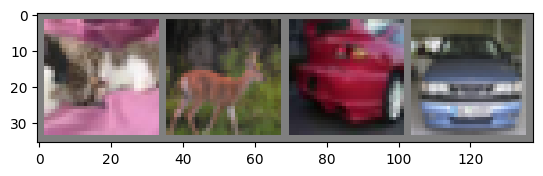

In [57]:
# show images
imshow(torchvision.utils.make_grid(images))

In [58]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  cat  deer   car   car
